# Домашнее задание № 1: исследование возможностей библиотеки scikit-fuzzy

Основные примитивы в scikit-fuzzy

1. **Функции принадлежности**

* Треугольная функция: fuzz.trimf
* Трапециевидная функция: fuzz.trapmf
* Гауссовская функция: fuzz.gaussmf
* Сигмоидальная функция: fuzz.sigmf
* Звонковая (колоколообразная) функция: fuzz.gbellmf

2. **Нечеткие переменные**

* Antecedent
* Consequent

Эти классы позволяют создавать нечеткие переменные, добавлять им условия (например, «низкий», «средний», «высокий») и задавать функции принадлежности.

3. **Нечеткие правила**

* Rule

Правила описываются в формате if-then и используют логические операторы для соединения различных условий.

4. **Система управления**

* ControlSystem
* ControlSystemSimulation

Класс ControlSystem используется для объединения всех правил и создания системы управления. Он связывает правила и позволяет вычислять вывод на их основе.

Класс ControlSystemSimulation используется для выполнения симуляции. Он принимает значения входных переменных, вычисляет значения выходных переменных на основе заданных правил




In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


## Функции Принадлежности

In [2]:
# Создаем диапазон для входных значений
x = np.linspace(0, 10, 100)

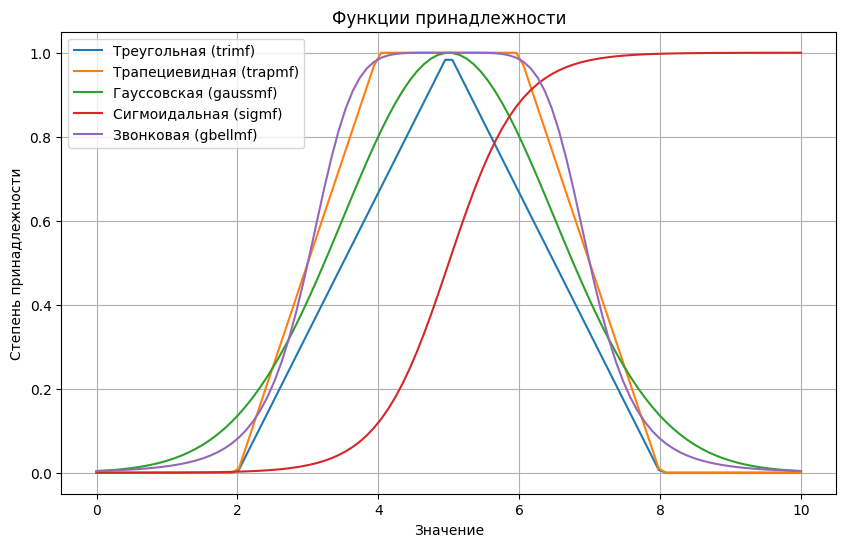

In [3]:
# Примеры функций принадлежности
trimf = fuzz.trimf(x, [2, 5, 8])  # Треугольная функция
trapmf = fuzz.trapmf(x, [2, 4, 6, 8])  # Трапециевидная функция
gaussmf = fuzz.gaussmf(x, 5, 1.5)  # Гауссовская функция
sigmf = fuzz.sigmf(x, 5, 2)  # Сигмоидальная функция
gbellmf = fuzz.gbellmf(x, 2, 3, 5)  # Звонковая функция

# Визуализация функций принадлежности
plt.figure(figsize=(10, 6))
plt.plot(x, trimf, label="Треугольная (trimf)")
plt.plot(x, trapmf, label="Трапециевидная (trapmf)")
plt.plot(x, gaussmf, label="Гауссовская (gaussmf)")
plt.plot(x, sigmf, label="Сигмоидальная (sigmf)")
plt.plot(x, gbellmf, label="Звонковая (gbellmf)")
plt.title("Функции принадлежности")
plt.xlabel("Значение")
plt.ylabel("Степень принадлежности")
plt.legend()
plt.grid()
plt.show()

Основа ФП — это функции NumPy. Все ФП принимают:

* Диапазон значений (x) — массив входных данных.
* Параметры функции (например, положения вершин или границ для треугольной и трапециевидной функций).

## Нечеткие переменные (Antecedent, Consequent)

Это входные и выходные переменные системы. Для них определяются:

* Диапазон значений
* Функции принадлежности

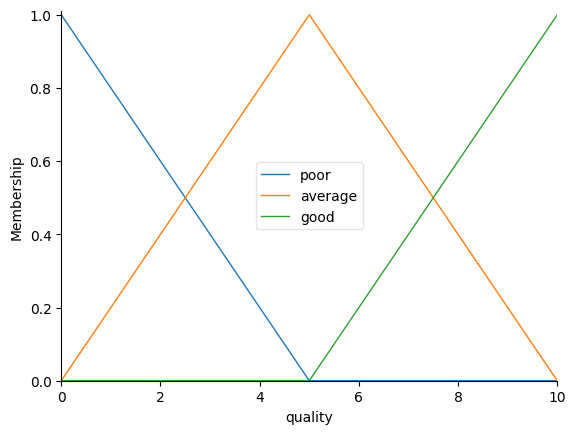

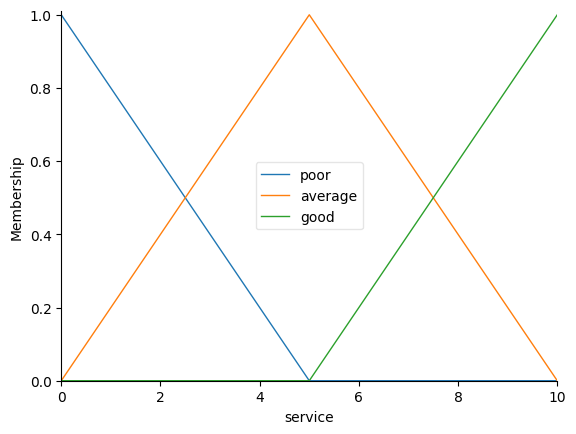

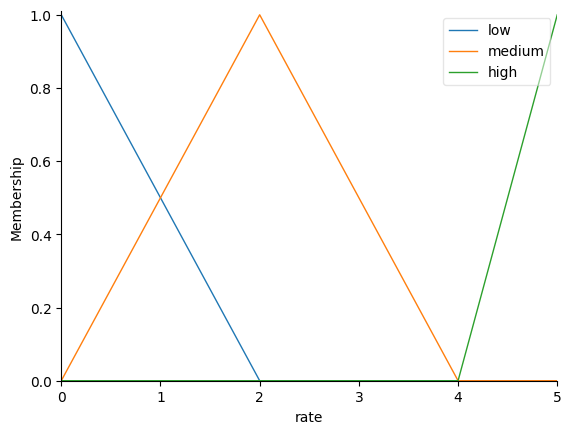

In [12]:
from skfuzzy.control import Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation

# Создаем диапазоны значений
x_quality = np.arange(0, 11, 1)  # Качество обслуживания (от 0 до 10)
x_service = np.arange(0, 11, 1)  # Качество товара (от 0 до 10)
x_rate = np.arange(0, 6, 1)      # Рейтинг магазина (от 0 до 5)

# Определяем входные нечеткие переменные
quality = Antecedent(x_quality, "quality")  # Вход: качество товара
service = Antecedent(x_service, "service")  # Вход: качество обслуживания

# Определяем выходную нечеткую переменную
rate = Consequent(x_rate, "rate")              # Выход: рейтинг

# Задаем функции принадлежности
quality["poor"] = fuzz.trimf(x_quality, [0, 0, 5])    # "Плохое"
quality["average"] = fuzz.trimf(x_quality, [0, 5, 10]) # "Среднее"
quality["good"] = fuzz.trimf(x_quality, [5, 10, 10])   # "Хорошее"

service["poor"] = fuzz.trimf(x_service, [0, 0, 5])    # "Плохое"
service["average"] = fuzz.trimf(x_service, [0, 5, 10]) # "Среднее"
service["good"] = fuzz.trimf(x_service, [5, 10, 10])   # "Хорошее"

rate["low"] = fuzz.trimf(x_rate, [0, 0, 2])      # "Маленький"
rate["medium"] = fuzz.trimf(x_rate, [0, 2, 4])  # "Средний"
rate["high"] = fuzz.trimf(x_rate, [4, 5, 5])   # "Высокий"

# Визуализация функций принадлежности
quality.view()
service.view()
rate.view()

Параметры:

* universe: диапазон значений (массив NumPy).
* label: имя переменной (строка).

Функции принадлежности добавляются с помощью словарей

Внутренние структуры:

В основе Antecedent и Consequent лежат словари Python для хранения функций принадлежности.
Каждое значение в universe ассоциируется со степенью принадлежности.

## Нечеткие правила (Rule)

Правила определяют логику системы в формате IF-THEN

In [13]:
# Определяем правила

rule1 = Rule(quality["poor"] | service["poor"], rate["low"])
# Если качество товара или обслуживания плохое, то рейтинг низкий

rule2 = Rule(service["average"], rate["medium"])
# Если обслуживание среднее, то рейтинг средний

rule3 = Rule(quality["good"] & service["good"], rate["high"])
# Если качество товара и обслуживания хорошее, то рейтинг высокий

Параметры:

* Условие (Antecedent): выражение с использованием & (и) или | (или).
* Действие (Consequent): логическое утверждение для выходной переменной.

Внутри правила хранятся связи между входными и выходными переменными.

Внутренние структуры:

Условия преобразуются в граф, где узлы — это переменные, а ребра — их логические связи.
Используется NumPy для вычислений вектора условий на основе степеней принадлежности.

## Система управления (ControlSystem, ControlSystemSimulation)

Собираем все правила в систему и выполняем симуляцию.

Рекомендованный рейтинг: 3.59


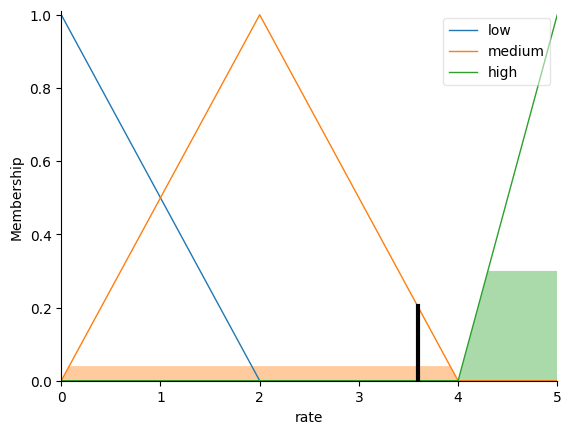

In [14]:
# Создаем систему управления
rating_ctrl = ControlSystem([rule1, rule2, rule3])
rating_sim = ControlSystemSimulation(rating_ctrl)

# Пример ввода значений
rating_sim.input["quality"] = 6.5  # Качество товара
rating_sim.input["service"] = 9.8  # Качество обслуживания

# Выполняем расчет
rating_sim.compute()

# Вывод результата
print(f"Рекомендованный рейтинг: {rating_sim.output['rate']:.2f}")

# Визуализация результата
rate.view(sim=rating_sim)

Параметры:

* ControlSystem: принимает список правил.
* ControlSystemSimulation: используется для ввода данных и выполнения вычислений.

Внутренние структуры:

* ControlSystem:
Хранит список правил.
Организует их в иерархию для последовательного выполнения.

* ControlSystemSimulation:
Хранит текущие значения входов.
Вычисляет выходы на основе правил с использованием композиции, агрегации и дефаззификации.
Основа — NumPy для математических операций.


## Итоги

Вся библиотека базируется на NumPy, что обеспечивает высокую производительность.

Ключевые элементы:

* Функции принадлежности — векторизированные вычисления.

* Нечеткие переменные — словари для хранения функций принадлежности.

* Правила — логические графы для связывания условий и действий.

* Система управления — композиция правил с дефаззификацией.